# <center>INFO 6105 - Assignment 2 - FIFA 2018 (Part B - Logistic Model) PinHo Wang</center>

# Abstract

In this assignment, we try to build the logistic model that can predict whether a player is good at skill move or not. The value of skill moves in the dataset are from 1 to 5, so we can define if the player is good at skill moves if it is higher or equal to 3, otherwise, not. Similiar to part A (Linear Regression), we first clean up the dataset and trying to know the correlation between the variables and also whether significant.

# Experiments

## Data Preprocessing

We will do the same process like part A to preprocess our dataset.

In [330]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import cross_val_score

In [331]:
df = pd.read_csv('data.csv', decimal = ',')

In [332]:
df = df.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Work Rate', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Body Type', 'Position', 'Release Clause'])

## Target Variable

In [333]:
df['Skill Moves'].isnull().sum()

48

In [334]:
df = df[~df['Skill Moves'].isnull()]

In [335]:
df['Skill Moves'].isnull().sum()

0

In [336]:
# make sure all the values are in the range of 1 to 5
df['Skill Moves'].astype('category')

0        4.0
1        5.0
2        5.0
3        1.0
4        4.0
5        4.0
6        4.0
7        3.0
8        3.0
9        1.0
10       4.0
11       3.0
12       2.0
13       4.0
14       2.0
15       4.0
16       3.0
17       4.0
18       1.0
19       1.0
20       3.0
21       3.0
22       1.0
23       4.0
24       2.0
25       5.0
26       4.0
27       2.0
28       4.0
29       4.0
        ... 
18177    2.0
18178    1.0
18179    2.0
18180    1.0
18181    2.0
18182    2.0
18183    1.0
18184    2.0
18185    2.0
18186    2.0
18187    2.0
18188    2.0
18189    2.0
18190    2.0
18191    2.0
18192    2.0
18193    2.0
18194    1.0
18195    2.0
18196    2.0
18197    2.0
18198    1.0
18199    2.0
18200    2.0
18201    2.0
18202    2.0
18203    2.0
18204    2.0
18205    2.0
18206    2.0
Name: Skill Moves, Length: 18159, dtype: category
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

In [337]:
df['Skill Moves'] = pd.Series(np.where(df['Skill Moves'].values > 2, 1, 0), df['Skill Moves'].index)

In [338]:
df['Skill Moves'].astype('category')

0        1
1        1
2        1
3        0
4        1
5        1
6        1
7        1
8        1
9        0
10       1
11       1
12       0
13       1
14       0
15       1
16       1
17       1
18       0
19       0
20       1
21       1
22       0
23       1
24       0
25       1
26       1
27       0
28       1
29       1
        ..
18177    0
18178    0
18179    0
18180    0
18181    0
18182    0
18183    0
18184    0
18185    0
18186    0
18187    0
18188    0
18189    0
18190    0
18191    0
18192    0
18193    0
18194    0
18195    0
18196    0
18197    0
18198    0
18199    0
18200    0
18201    0
18202    0
18203    0
18204    0
18205    0
18206    0
Name: Skill Moves, Length: 18159, dtype: category
Categories (2, int64): [0, 1]

## Variables

For the other variables, we do the same process like part A.

### Wage

In [339]:
df['Wage'] = df['Wage'].str.split('€').str[1].str.split('K').str[0]

In [340]:
df['Wage'] = df['Wage'].astype('int64') * 1000

### Age

In [341]:
df['Age'].isnull().sum()

0

In [342]:
df['Age'].astype('category')

0        31
1        33
2        26
3        27
4        27
5        27
6        32
7        31
8        32
9        25
10       29
11       28
12       32
13       32
14       27
15       24
16       24
17       27
18       26
19       26
20       29
21       31
22       32
23       30
24       33
25       19
26       26
27       26
28       26
29       27
         ..
18177    18
18178    18
18179    17
18180    22
18181    17
18182    18
18183    44
18184    18
18185    19
18186    20
18187    19
18188    17
18189    18
18190    18
18191    18
18192    18
18193    18
18194    18
18195    18
18196    19
18197    18
18198    18
18199    18
18200    18
18201    18
18202    19
18203    19
18204    16
18205    17
18206    16
Name: Age, Length: 18159, dtype: category
Categories (29, int64): [16, 17, 18, 19, ..., 41, 42, 44, 45]

### Overall

In [343]:
df['Overall'].isnull().sum()

0

In [344]:
df['Overall'].astype('category')

0        94
1        94
2        92
3        91
4        91
5        91
6        91
7        91
8        91
9        90
10       90
11       90
12       90
13       90
14       89
15       89
16       89
17       89
18       89
19       89
20       89
21       89
22       89
23       89
24       89
25       88
26       88
27       88
28       88
29       88
         ..
18177    48
18178    48
18179    48
18180    48
18181    48
18182    48
18183    48
18184    48
18185    48
18186    47
18187    47
18188    47
18189    47
18190    47
18191    47
18192    47
18193    47
18194    47
18195    47
18196    47
18197    47
18198    47
18199    47
18200    47
18201    47
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18159, dtype: category
Categories (48, int64): [46, 47, 48, 49, ..., 90, 91, 92, 94]

### Potential

In [345]:
df['Potential'].isnull().sum()

0

In [346]:
df['Potential'].astype('category')

0        94
1        94
2        93
3        93
4        92
5        91
6        91
7        91
8        91
9        93
10       90
11       90
12       90
13       90
14       90
15       94
16       91
17       90
18       92
19       90
20       89
21       89
22       89
23       89
24       89
25       95
26       89
27       90
28       89
29       88
         ..
18177    69
18178    65
18179    64
18180    58
18181    66
18182    65
18183    48
18184    55
18185    59
18186    64
18187    59
18188    62
18189    61
18190    67
18191    65
18192    64
18193    64
18194    65
18195    67
18196    61
18197    61
18198    70
18199    69
18200    62
18201    68
18202    65
18203    63
18204    67
18205    66
18206    66
Name: Potential, Length: 18159, dtype: category
Categories (47, int64): [48, 50, 51, 52, ..., 92, 93, 94, 95]

### Value

In [347]:
df['Value'].isnull().sum()

0

In [348]:
df['Value']

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
5           €93M
6           €67M
7           €80M
8           €51M
9           €68M
10          €77M
11        €76.5M
12          €44M
13          €60M
14          €63M
15          €89M
16        €83.5M
17          €78M
18          €58M
19        €53.5M
20        €51.5M
21          €60M
22          €38M
23        €64.5M
24          €27M
25          €81M
26        €69.5M
27        €59.5M
28        €69.5M
29          €62M
          ...   
18177       €70K
18178       €50K
18179       €50K
18180       €40K
18181       €50K
18182       €50K
18183         €0
18184       €40K
18185       €50K
18186       €60K
18187       €40K
18188       €60K
18189       €60K
18190       €60K
18191       €50K
18192       €50K
18193       €50K
18194       €50K
18195       €60K
18196       €60K
18197       €60K
18198       €60K
18199       €70K
18200       €60K
18201       €60K
18202       €60K
18203       €60K
18204       €6

In [349]:
b = (df['Value'].str.split('€').str[1].str.split('M').str).len() == 2
millions = df['Value'].str.split('€').str[1].str.split('M')[b].str[0].astype('float64')
killions = df['Value'].str.split('€').str[1].str.split('M')[~b].str[0].str.split('K').str[0].astype('float64')

In [350]:
df['Value'][b] = millions * 1000000

C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [351]:
df['Value'][~b] = killions * 1000

C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [352]:
df['Value']

0        1.105e+08
1          7.7e+07
2        1.185e+08
3          7.2e+07
4         1.02e+08
5          9.3e+07
6          6.7e+07
7            8e+07
8          5.1e+07
9          6.8e+07
10         7.7e+07
11        7.65e+07
12         4.4e+07
13           6e+07
14         6.3e+07
15         8.9e+07
16        8.35e+07
17         7.8e+07
18         5.8e+07
19        5.35e+07
20        5.15e+07
21           6e+07
22         3.8e+07
23        6.45e+07
24         2.7e+07
25         8.1e+07
26        6.95e+07
27        5.95e+07
28        6.95e+07
29         6.2e+07
           ...    
18177        70000
18178        50000
18179        50000
18180        40000
18181        50000
18182        50000
18183            0
18184        40000
18185        50000
18186        60000
18187        40000
18188        60000
18189        60000
18190        60000
18191        50000
18192        50000
18193        50000
18194        50000
18195        60000
18196        60000
18197        60000
18198       

In [353]:
df['Value'][df['Value'] == 0] = df['Value'].median()

C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [354]:
df['Value'].astype('category')

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
5         93000000.0
6         67000000.0
7         80000000.0
8         51000000.0
9         68000000.0
10        77000000.0
11        76500000.0
12        44000000.0
13        60000000.0
14        63000000.0
15        89000000.0
16        83500000.0
17        78000000.0
18        58000000.0
19        53500000.0
20        51500000.0
21        60000000.0
22        38000000.0
23        64500000.0
24        27000000.0
25        81000000.0
26        69500000.0
27        59500000.0
28        69500000.0
29        62000000.0
            ...     
18177        70000.0
18178        50000.0
18179        50000.0
18180        40000.0
18181        50000.0
18182        50000.0
18183       675000.0
18184        40000.0
18185        50000.0
18186        60000.0
18187        40000.0
18188        60000.0
18189        60000.0
18190        60000.0
18191        50000.0
18192        50000.0
18193        

In [355]:
df['Value'] = df['Value'].astype('float64')

### Preferred Foot

In [356]:
df['Preferred Foot'].isnull().sum()

0

In [357]:
df['Preferred Foot'].astype('category')

0         Left
1        Right
2        Right
3        Right
4        Right
5        Right
6        Right
7        Right
8        Right
9        Right
10       Right
11       Right
12       Right
13        Left
14       Right
15        Left
16       Right
17        Left
18       Right
19        Left
20       Right
21       Right
22       Right
23       Right
24        Left
25       Right
26        Left
27       Right
28        Left
29       Right
         ...  
18177    Right
18178    Right
18179    Right
18180    Right
18181    Right
18182    Right
18183    Right
18184    Right
18185    Right
18186    Right
18187    Right
18188    Right
18189    Right
18190    Right
18191     Left
18192    Right
18193    Right
18194    Right
18195    Right
18196    Right
18197    Right
18198    Right
18199    Right
18200     Left
18201     Left
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18159, dtype: category
Categories (2, object): [Left, R

In [358]:
df = pd.concat([df, pd.get_dummies(df['Preferred Foot'])], axis=1)

In [359]:
df['Left'].astype('category')

0        1
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       1
16       0
17       1
18       0
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26       1
27       0
28       1
29       0
        ..
18177    0
18178    0
18179    0
18180    0
18181    0
18182    0
18183    0
18184    0
18185    0
18186    0
18187    0
18188    0
18189    0
18190    0
18191    1
18192    0
18193    0
18194    0
18195    0
18196    0
18197    0
18198    0
18199    0
18200    1
18201    1
18202    0
18203    0
18204    0
18205    0
18206    0
Name: Left, Length: 18159, dtype: category
Categories (2, uint64): [0, 1]

### Weak Foot

In [360]:
df['Weak Foot'].isnull().sum()

0

In [361]:
df['Weak Foot'].astype('category')

0        4.0
1        4.0
2        5.0
3        3.0
4        5.0
5        4.0
6        4.0
7        4.0
8        3.0
9        3.0
10       4.0
11       5.0
12       3.0
13       2.0
14       3.0
15       3.0
16       4.0
17       3.0
18       4.0
19       2.0
20       3.0
21       4.0
22       4.0
23       4.0
24       3.0
25       4.0
26       3.0
27       3.0
28       3.0
29       3.0
        ... 
18177    3.0
18178    2.0
18179    3.0
18180    2.0
18181    2.0
18182    3.0
18183    2.0
18184    3.0
18185    3.0
18186    3.0
18187    3.0
18188    3.0
18189    3.0
18190    3.0
18191    3.0
18192    3.0
18193    2.0
18194    3.0
18195    3.0
18196    3.0
18197    3.0
18198    2.0
18199    3.0
18200    2.0
18201    3.0
18202    2.0
18203    2.0
18204    3.0
18205    3.0
18206    3.0
Name: Weak Foot, Length: 18159, dtype: category
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

### International Reputation

In [362]:
df['International Reputation'].isnull().sum()

0

In [363]:
df['International Reputation'].astype('category')

0        5.0
1        5.0
2        5.0
3        4.0
4        4.0
5        4.0
6        4.0
7        5.0
8        4.0
9        3.0
10       4.0
11       4.0
12       3.0
13       4.0
14       3.0
15       3.0
16       3.0
17       4.0
18       3.0
19       4.0
20       4.0
21       4.0
22       5.0
23       4.0
24       4.0
25       3.0
26       3.0
27       3.0
28       4.0
29       3.0
        ... 
18177    1.0
18178    1.0
18179    1.0
18180    1.0
18181    1.0
18182    1.0
18183    1.0
18184    1.0
18185    1.0
18186    1.0
18187    1.0
18188    1.0
18189    1.0
18190    1.0
18191    1.0
18192    1.0
18193    1.0
18194    1.0
18195    1.0
18196    1.0
18197    1.0
18198    1.0
18199    1.0
18200    1.0
18201    1.0
18202    1.0
18203    1.0
18204    1.0
18205    1.0
18206    1.0
Name: International Reputation, Length: 18159, dtype: category
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

### Height

In [364]:
df['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
5         5'8
6         5'8
7         6'0
8         6'0
9         6'2
10        6'0
11        6'0
12        6'2
13        5'8
14        5'6
15       5'10
16        6'2
17        5'9
18        6'2
19        6'6
20        6'2
21        6'1
22        6'4
23        5'8
24        6'2
25       5'10
26        5'9
27        6'1
28       5'11
29        5'4
         ... 
18177    5'10
18178     6'0
18179     6'2
18180     6'1
18181    5'11
18182    5'10
18183     6'2
18184     6'1
18185    5'11
18186    5'10
18187    5'10
18188    5'10
18189    5'10
18190     5'9
18191    5'11
18192     6'1
18193     5'8
18194     6'3
18195     5'8
18196     5'7
18197    5'10
18198    5'11
18199     5'6
18200     5'9
18201     6'1
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18159, dtype: object

In [365]:
df['Height'].isnull().sum()

0

In [366]:
h = df['Height'].str.split('\'')

In [367]:
df['Height'] = h.str[0].astype('int64')*12 + h.str[1].astype('int64')

In [368]:
df['Height']

0        67
1        74
2        69
3        76
4        71
5        68
6        68
7        72
8        72
9        74
10       72
11       72
12       74
13       68
14       66
15       70
16       74
17       69
18       74
19       78
20       74
21       73
22       76
23       68
24       74
25       70
26       69
27       73
28       71
29       64
         ..
18177    70
18178    72
18179    74
18180    73
18181    71
18182    70
18183    74
18184    73
18185    71
18186    70
18187    70
18188    70
18189    70
18190    69
18191    71
18192    73
18193    68
18194    75
18195    68
18196    67
18197    70
18198    71
18199    66
18200    69
18201    73
18202    69
18203    75
18204    68
18205    70
18206    70
Name: Height, Length: 18159, dtype: int64

### Weight

In [369]:
df['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
5        163lbs
6        146lbs
7        190lbs
8        181lbs
9        192lbs
10       176lbs
11       168lbs
12       172lbs
13       148lbs
14       159lbs
15       165lbs
16       196lbs
17       161lbs
18       187lbs
19       212lbs
20       168lbs
21       170lbs
22       203lbs
23       154lbs
24       187lbs
25       161lbs
26       157lbs
27       185lbs
28       172lbs
29       130lbs
          ...  
18177    163lbs
18178    176lbs
18179    163lbs
18180    172lbs
18181    134lbs
18182    165lbs
18183    190lbs
18184    179lbs
18185    159lbs
18186    174lbs
18187    161lbs
18188    148lbs
18189    165lbs
18190    176lbs
18191    168lbs
18192    165lbs
18193    146lbs
18194    187lbs
18195    141lbs
18196    146lbs
18197    141lbs
18198    154lbs
18199    150lbs
18200    157lbs
18201    168lbs
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18

In [370]:
df['Weight'].isnull().sum()

0

In [371]:
df['Weight'] = df['Weight'].str.split('lbs').str[0].astype('int64')

In [372]:
df['Weight']

0        159
1        183
2        150
3        168
4        154
5        163
6        146
7        190
8        181
9        192
10       176
11       168
12       172
13       148
14       159
15       165
16       196
17       161
18       187
19       212
20       168
21       170
22       203
23       154
24       187
25       161
26       157
27       185
28       172
29       130
        ... 
18177    163
18178    176
18179    163
18180    172
18181    134
18182    165
18183    190
18184    179
18185    159
18186    174
18187    161
18188    148
18189    165
18190    176
18191    168
18192    165
18193    146
18194    187
18195    141
18196    146
18197    141
18198    154
18199    150
18200    157
18201    168
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18159, dtype: int64

### Position

In [373]:
position = df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]

In [374]:
position.isnull().sum().sum()

52962

In [375]:
# Convert 45+2 into 47 (int64)
for x in position:
    n = position[x][~position[x].isnull()].str.split('+')
    df[x] = n.str[0].astype('int64') + n.str[1].astype('int64')
    df[x][df[x].isnull()] = df[x].median()

C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Crossing

In [376]:
df['Crossing'].isnull().sum()

0

### Finishing

In [377]:
df['Finishing'].isnull().sum()

0

### HeadingAccuracy

In [378]:
df['HeadingAccuracy'].isnull().sum()

0

### ShortPassing

In [379]:
df['ShortPassing'].isnull().sum()

0

### Volleys

In [380]:
df['Volleys'].isnull().sum()

0

### Dribbling

In [381]:
df['Dribbling'].isnull().sum()

0

### Curve

In [382]:
df['Curve'].isnull().sum()

0

### FKAccuracy

In [383]:
df['FKAccuracy'].isnull().sum()

0

### LongPassing

In [384]:
df['LongPassing'].isnull().sum()

0

### BallControl

In [385]:
df['BallControl'].isnull().sum()

0

### Acceleration

In [386]:
df['Acceleration'].isnull().sum()

0

### SprintSpeed

In [387]:
df['SprintSpeed'].isnull().sum()

0

### Agility

In [388]:
df['Agility'].isnull().sum()

0

### Reactions

In [389]:
df['Reactions'].isnull().sum()

0

### Balance

In [390]:
df['Balance'].isnull().sum()

0

## Features Selection

In [391]:
move_corr_seq = (df.corr()['Skill Moves']).sort_values(ascending=False).drop('Skill Moves')
move_corr_seq

LW                          0.672151
RW                          0.672151
LAM                         0.658455
CAM                         0.658455
RAM                         0.658455
LF                          0.657415
CF                          0.657415
RF                          0.657415
RM                          0.653988
LM                          0.653988
Dribbling                   0.650105
Curve                       0.632112
Positioning                 0.620862
RS                          0.619514
ST                          0.619514
LS                          0.619514
Finishing                   0.617071
Vision                      0.616775
LongShots                   0.615857
Volleys                     0.608133
BallControl                 0.600042
Special                     0.583561
Crossing                    0.574357
FKAccuracy                  0.566992
Agility                     0.557898
ShotPower                   0.552438
RCM                         0.543522
C

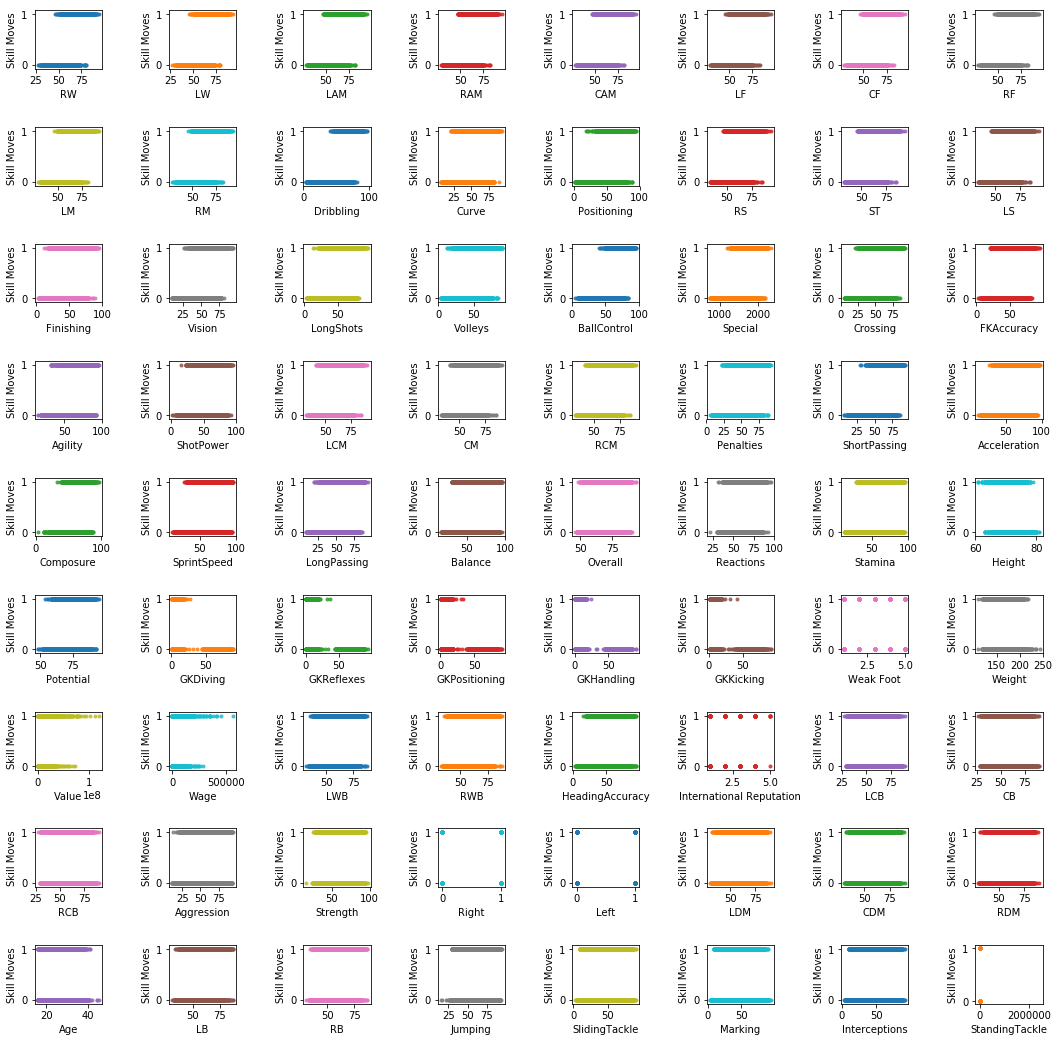

In [392]:
fig, axes = plt.subplots(nrows=9, ncols=8, figsize=(10,10))
plt.subplots_adjust(left = -0.5, bottom=-0.5, hspace=1.0, wspace=1.0)

corr_to_move = pd.Series()
for col in df.columns.values[1:]:
    if (((col!='Skill Moves') & (col!='Name') & (col!='Preferred Foot'))):
        corr_to_move[col] = df['Skill Moves'].corr(df[col])
abs_corr_to_move = corr_to_move.abs().sort_values(ascending=False)
corr_to_move = corr_to_move.loc[abs_corr_to_move.index]

for i in range(9):
    for j in range(8):
        sns.regplot(x=corr_to_move.index.values[i*8+j], y='Skill Moves', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')

axes[1,2].set_xlim(0,102)
plt.show()

### Significant

Then, we investigate the significant, p-value, between top 20 correlation features as the diagram below. As you can see, there contains some values higher than 0.05, which relate not significant.

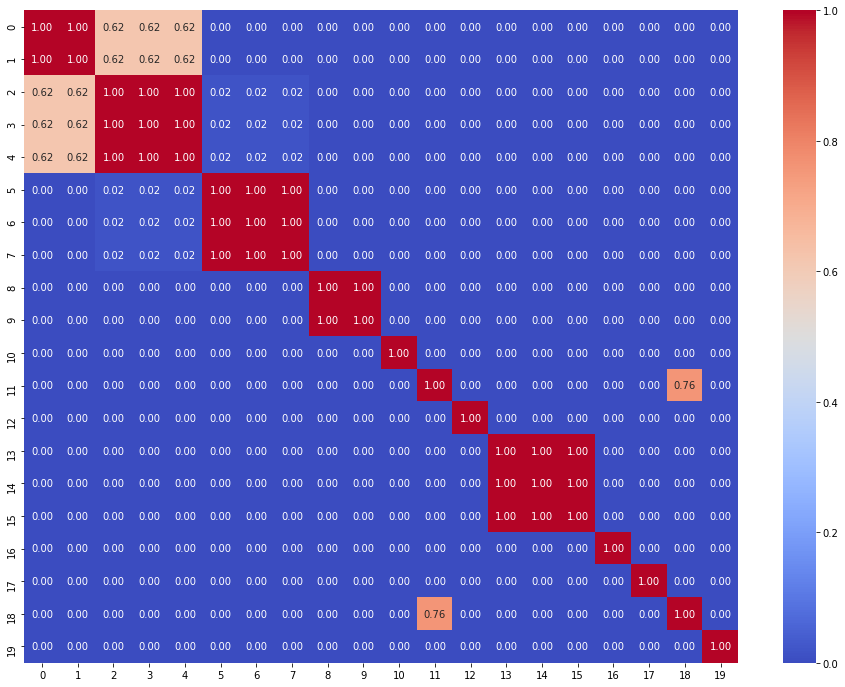

In [393]:
allFeatures = df[abs_corr_to_move.index[:20]].columns
matrix = [[0 for x in range(len(allFeatures))] for y in range(len(allFeatures))] 
for i in range(len(allFeatures)):
    for j in range(len(allFeatures)):
        t, p = stats.ttest_ind(df[allFeatures[i]], df[allFeatures[j]])
        matrix[i][j] = p
sign = pd.DataFrame(data=matrix)
plt.figure(figsize=(16,12))
sns.heatmap(data=sign,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [394]:
features = abs_corr_to_move.index[4:14]
features

Index(['CAM', 'LF', 'CF', 'RF', 'LM', 'RM', 'Dribbling', 'Curve',
       'Positioning', 'RS'],
      dtype='object')

At result, we choose these ten features above to build the models.

## Modeling

### Training and Testing

In [395]:
def buildLogiRModel(f):
    scores = []
    models = []
    train_X = []
    train_Y = []
    test_X = []
    test_Y = []
    
    for i in range(0, len(f)):
        train, test = train_test_split(df, test_size=0.3, shuffle=True)
        training_feature = f[0:i+1]
        target = 'Skill Moves'
        train_X.append(train[training_feature])
        train_Y.append(train[target])
        test_X.append(test[training_feature])
        test_Y.append(test[target])
#         model = sm.Logit()
        model = LogisticRegression()
        result = model.fit(train[training_feature], train[target])
        score = result.score(test[training_feature], test[target])
        
        models.append(result)
        scores.append(score)
    return [scores, models, train_X, train_Y, test_X, test_Y]

In [396]:
[scores, models, train_X, train_Y, test_X, test_Y] = buildLogiRModel(features)

C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

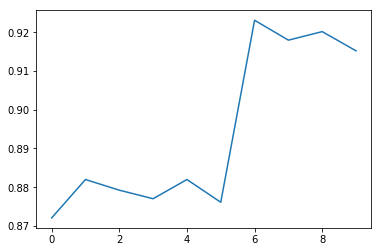

In [397]:
plt.plot(scores)

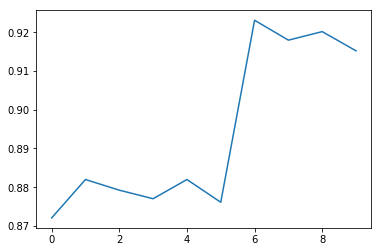

In [398]:
while scores.index(max(scores)) < 6:
    [scores, models, train_X, train_Y, test_X, test_Y] = buildLogiRModel(features)
plt.plot(scores)
modelIndex = scores.index(max(scores))

In [399]:
print("model number: " + str(modelIndex) + ", Mean accuracy: " + str(scores[modelIndex]))

model number: 6, Mean accuracy: 0.9230910425844346


After training the model, we can obtain the model 6 (7 features) is the most accuracy to testing data. Then, we can exam further by cross validation.

### Cross Validation

In [400]:
def buildLogiRModelCV(f):
    scores_CV = []
    
    for i in range(0, len(f)):
        training_feature = f[0:i+1]
        target = 'Skill Moves'
        model = LogisticRegression()
#         score = cross_val_score(model, df[training_feature], df[target], cv=5, scoring='homogeneity_score')
        score = cross_val_score(model, df[training_feature], df[target], cv=5)
        scores_CV.append(sum(score)/len(score))
    return scores_CV

In [401]:
scores_CV = buildLogiRModelCV(features)

C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc87\Anaconda3\envs\py3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

In [402]:
scores_CV

[0.8502027442101253,
 0.8531216257934073,
 0.8531216257934073,
 0.8531216257934073,
 0.8548834066472069,
 0.8548834066472069,
 0.8957490049315421,
 0.893270576530611,
 0.8910680243520508,
 0.8900760313430878]

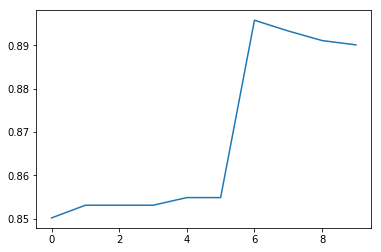

In [403]:
plt.plot(scores_CV)

In [404]:
modelIndex_CV = scores_CV.index(max(scores_CV))

In [405]:
modelIndex_CV

6

After we exam the dataset by cross validation, the mean accuracy are lightly less than one we calcuated previously, but overall, the model six still stand out, which combines the features below.

In [407]:
features[:modelIndex_CV+1]

Index(['CAM', 'LF', 'CF', 'RF', 'LM', 'RM', 'Dribbling'], dtype='object')

Look closer to the features, 'CAM' stands the player's 'Center Attacking Midfielder' performance, 'LF' stands 'Left Forward' performance, 'CF' stands 'Center Forward' performance, 'RF' stands 'Right Forward' performance, 'LM' stands 'Left Midfielder' performance, 'RM' stands 'Right Midfielder' performance, 'Dribbling' stands 'Dribbling' performance.

# Conclusion

We first clean up the dataset, eliminating the NaN values and the unnormal values. After we clean up the dataset, we investigate the correlation relationship between the features and selected out ten features for building different models. Meanwhile, we using t-testing and p-value to exam whether the features are significant to each other. We found out the choosing features are all significant. Later on, we started training our models. We first select ten features trying to choose the most accuarcy model. After we splitted the training and testing dataset, the most accuarcy of the model is about 0.9231. Then, we exam the dataset with cross validation, although the accuarcy is less than the previous model, but we can still get a same model.

# Contributions

By own: 90%
By external resource: 10%

# citations

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#examples-using-sklearn-model-selection-cross-val-score

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# License

Copyright 2019 PinHo Wang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.